##### Simulated PCA      
PCA is an unsupervised method.   

Reduce the dimensions on this dataset while fitting a logistic regression model.   

We will use a Pipeline where the first step performs the PCA transform and selects the 10 most important dimensions or components, then fits a logistic regression model on these features. We don’t need to normalize the variables on this dataset, as all variables have the same scale by design.

The pipeline will be evaluated using repeated stratified cross-validation with three repeats and 10 folds per repeat. Performance is presented as the mean classification accuracy.

In [1]:
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

pca = PCA(n_components=10)
model = LogisticRegression()
model = model.fit(X, y)

# Can use pipeline   
# steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
# model = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # cv is crossvalidation  
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(f"Accuracy Mean:      {mean(n_scores):.3f}\nStandard Deviation: {std(n_scores):.3f}") 

Accuracy Mean:      0.865
Standard Deviation: 0.027


In [7]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(f"Mean Accuracy:      {mean(n_scores):.3f}\nStandard Deviation: {std(n_scores):.3f}") 

Mean Accuracy:      0.824
Standard Deviation: 0.034


In [8]:
cols = 20

def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=cols, n_informative=10, n_redundant=10, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models(cols):
    models = dict()
    for i in range(1,cols+1):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
X, y = get_dataset()
models = get_models(cols)    

In [9]:
def eval_pca(X, y, cols):
    results, names = list(), list()
    print("\nAccuracy Scores\ncols   mean   std")
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print(f'{name:5}  {mean(scores):.3f}  {std(scores):.3f}') # % (name, mean(scores), std(scores)))
    return results, names
    
results, names = eval_pca(X, y, cols);    


Accuracy Scores
cols   mean   std
1      0.775  0.036
2      0.794  0.040
3      0.802  0.035
4      0.811  0.038
5      0.816  0.037
6      0.820  0.034
7      0.820  0.033
8      0.823  0.032
9      0.821  0.031
10     0.824  0.034
11     0.824  0.034
12     0.824  0.034
13     0.824  0.034
14     0.824  0.034
15     0.824  0.034
16     0.824  0.034
17     0.824  0.034
18     0.824  0.034
19     0.824  0.034
20     0.824  0.034


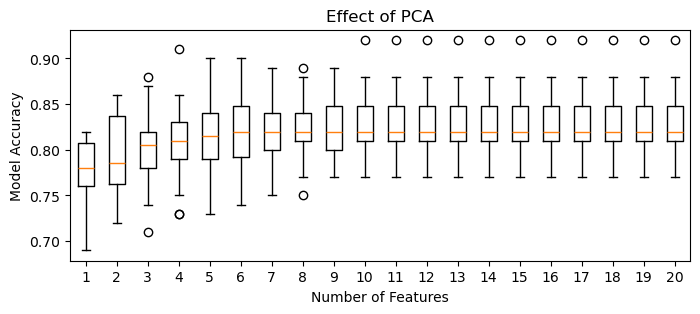

In [10]:
def plot_box(results, names):
    plt.figure(figsize=(8,3))
    plt.boxplot(results, labels=names) #, showmeans=True)
    plt.title("Effect of PCA");
    plt.ylabel("Model Accuracy")
    plt.xlabel("Number of Features");
    
plot_box(results, names)    

The parameter `n_informative=15` has caused flattening of accuracy score at 15   
Try other values.  

##### fitting and using a final model with PCA transforms on new data.   

In [11]:
model.fit(X, y)
row = [[0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [8]:
clf = PCA(0.95)

Thow away 5% of variance - may reduce the data by 50%   

https://www.cliffsnotes.com/study-notes/5212247    

#### PCA Students Data   

In [12]:
import pandas as pd

df = pd.read_excel('../Data/BSc23_Student_Data.xlsx')
df = df.dropna()
X = df[['Height_cm', 'Weight_Kg', 'Shoe_Size', 'Shoulder_cm',
       'Waist_cm']].values
y = df['Sex']

cols = 5
models = get_models(cols)

results, names = eval_pca(X, y, cols);           


Accuracy Scores
cols   mean   std
1      0.734  0.095
2      0.788  0.117
3      0.855  0.111
4      0.855  0.109
5      0.881  0.093


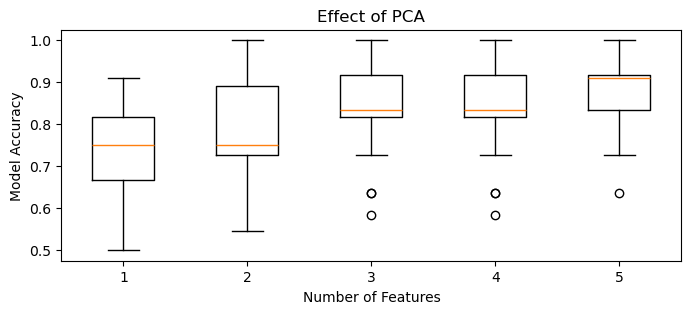

In [10]:
plot_box(results, names)    

In [13]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
digits.data.shape

(1797, 64)

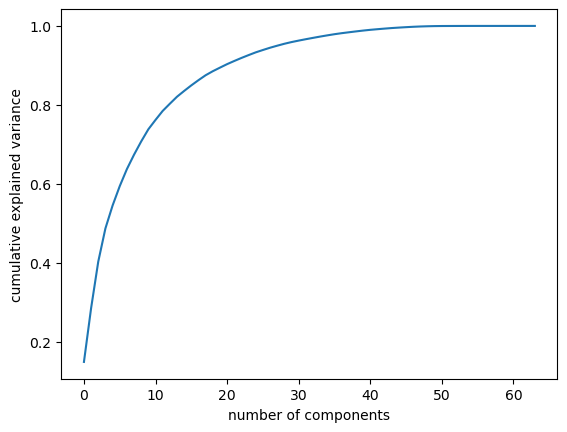

In [14]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Task   
Run PCA for 
1. Wisconsin Breast Cancer Dataset (WBCD).   
2. Sonar data.  